In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
tf.keras.backend.clear_session()

In [3]:
from tensorflow.keras import layers
class Linear(layers.Layer):

  def __init__(self, units=32, input_dim=32):
    super(Linear, self).__init__()
    w_init = tf.random_normal_initializer()
    self.w = tf.Variable(initial_value=w_init(shape=(input_dim, units),
                                              dtype='float32'),
                         trainable=True)
    b_init = tf.zeros_initializer()
    self.b = tf.Variable(initial_value=b_init(shape=(units,),
                                              dtype='float32'),
                         trainable=True)

  def call(self, inputs):
    return tf.matmul(inputs, self.w) + self.b

x = tf.ones((2, 2))
linear_layer = Linear(4, 2)
y = linear_layer(x)
print(y)

tf.Tensor(
[[-0.03507778  0.02703214 -0.08143208  0.00299811]
 [-0.03507778  0.02703214 -0.08143208  0.00299811]], shape=(2, 4), dtype=float32)


In [4]:
class ComputeSum(layers.Layer):
    def __init__(self, input_dim):
        super(ComputeSum, self).__init__()
        self.total = tf.Variable(initial_value=tf.zeros((input_dim,)),
                                trainable=False)
    def call(self, inputs):
        self.total.assign_add(tf.reduce_sum(inputs, axis=0))
        return self.total
    
x = tf.ones((2, 2))
my_sum = ComputeSum(2)
y = my_sum(x)
print(y.numpy())
y = my_sum(x)
print(y.numpy())

[2. 2.]
[4. 4.]


In [5]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(784,),name='digits')
x = layers.Dense(64, activation='relu', name='dense_1')(inputs)
x = layers.Dense(64, activation='relu', name='dense_2')(x)
outputs = layers.Dense(10, activation='softmax', name='predictions')(x)
model = keras.Model(inputs=inputs, outputs=outputs, name='3_layer_mlp')
model.summary()


Model: "3_layer_mlp"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
digits (InputLayer)          [(None, 784)]             0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
predictions (Dense)          (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


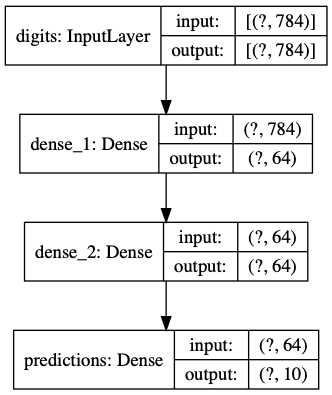

In [6]:
keras.utils.plot_model(model, to_file='my_model.png', show_shapes=True, show_layer_names=True)

In [7]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape(60000, 784).astype('float32') / 255
x_test = x_test.reshape(10000, 784).astype('float32') / 255

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop())
history = model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=1)

Train on 60000 samples
60000/60000 [==============================] - 3s 48us/sample - loss: 0.3175


In [8]:
predictions = model.predict(x_test)


In [9]:
model.save('my_model.h5')

In [10]:
new_model = keras.models.load_model('my_model.h5')

In [11]:
new_model.summary()

Model: "3_layer_mlp"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
digits (InputLayer)          [(None, 784)]             0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
predictions (Dense)          (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [12]:
new_predict = new_model.predict(x_test)

In [16]:
import numpy as np
np.testing.assert_allclose(predictions, new_predict, rtol=1e-6, atol=1e-6)

In [17]:
model.save('my_model', save_format='tf')

W1205 10:10:59.504235 4612167104 deprecation.py:506] From /usr/local/lib/python3.7/site-packages/tensorflow_core/python/ops/resource_variable_ops.py:1781: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [18]:
new_model = keras.models.load_model('my_model')

In [19]:
config = model.get_config()
reinitialized_model = keras.Model.from_config(config)

In [21]:
reinitialized_model.summary()

Model: "3_layer_mlp"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
digits (InputLayer)          [(None, 784)]             0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
predictions (Dense)          (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [22]:
json_config = model.to_json()

In [23]:
reinitialized_model = keras.models.model_from_config(json_config)

TypeError: string indices must be integers

In [24]:
weights = model.get_weights()
model.set_weights(weights)

In [26]:
config = model.get_config()
weights = model.get_weights()
new_model = keras.Model.from_config(config)
new_model.set_weights(weights)

new_predictions = new_model.predict(x_test)
np.testing.assert_allclose(predictions, new_predictions, rtol=1e-6, atol=1e-6)


In [27]:
model.save('path_to_my_model.h5')
del model
model = keras.models.load_model('path_to_my_model.h5')

In [32]:
class ThreeLayerMLP(keras.Model):

    def __init__(self, name=None):
        super(ThreeLayerMLP, self).__init__(name=name)
        self.dense_1 = layers.Dense(64, activation='relu', name='dense_1')
        self.dense_2 = layers.Dense(64, activation='relu', name='dense_2')
        self.pred_layer = layers.Dense(10, activation='softmax', name='predictions')

    def call(self, inputs):
        x = self.dense_1(inputs)
        x = self.dense_2(x)
        return self.pred_layer(x)

def get_model():
    return ThreeLayerMLP(name='3_layer_mlp')

model = get_model()

In [33]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape(60000, 784).astype('float32') / 255
x_test = x_test.reshape(10000, 784).astype('float32') / 255

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop())
history = model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=1)

Train on 60000 samples
60000/60000 [==============================] - 2s 37us/sample - loss: 0.3122


In [34]:
model.save_weights('my_model', save_format='tf')

In [35]:
predictions = model.predict(x_test)

In [37]:
first_batch_loss = model.train_on_batch(x_train[:64], y_train[:64])

In [38]:
first_batch_loss

0.0924011

In [39]:
new_model = get_model()
new_model.compile(loss='sparse_categorical_crossentropy',
                 optimizer=keras.optimizers.RMSprop())
new_model.train_on_batch(x_train[:1], y_train[:1])

2.34381

In [40]:
raw_inputs = [
  [83, 91, 1, 645, 1253, 927],
  [73, 8, 3215, 55, 927],
  [711, 632, 71]
]
padded_inputs = tf.keras.preprocessing.sequence.pad_sequences(raw_inputs, padding='post')

In [41]:
padded_inputs

array([[  83,   91,    1,  645, 1253,  927],
       [  73,    8, 3215,   55,  927,    0],
       [ 711,  632,   71,    0,    0,    0]], dtype=int32)

In [42]:
embedding=layers.Embedding(input_dim=5000, output_dim=16, mask_zero=True)
masked_output = embedding(padded_inputs)

In [43]:
print(masked_output._keras_mask)


tf.Tensor(
[[ True  True  True  True  True  True]
 [ True  True  True  True  True False]
 [ True  True  True False False False]], shape=(3, 6), dtype=bool)


In [45]:
masking_layer = layers.Masking()
# Simulate the embedding lookup by expanding the 2D input to 3D,
# with embedding dimension of 10.
unmasked_embedding = tf.cast(
    tf.tile(tf.expand_dims(padded_inputs, axis=-1), [1, 1, 10]),
    tf.float32)

masked_embedding = masking_layer(unmasked_embedding)
print(masked_embedding._keras_mask)

tf.Tensor(
[[ True  True  True  True  True  True]
 [ True  True  True  True  True False]
 [ True  True  True False False False]], shape=(3, 6), dtype=bool)


In [49]:
model = tf.keras.Sequential([layers.Embedding(input_dim=50000, output_dim=16,mask_zero=True),
                            layers.LSTM(32),])

In [ ]:
class FM(Layer):
    """Factorization Machine models pairwise (order-2) feature interactions
     without linear term and bias.
      Input shape
        - 3D tensor with shape: ``(batch_size,field_size,embedding_size)``.
      Output shape
        - 2D tensor with shape: ``(batch_size, 1)``.
      References
        - [Factorization Machines](https://www.csie.ntu.edu.tw/~b97053/paper/Rendle2010FM.pdf)
    """

    def __init__(self, **kwargs):

        super(FM, self).__init__(**kwargs)

    def build(self, input_shape):
        if len(input_shape) != 3:
            raise ValueError("Unexpected inputs dimensions % d,\
                             expect to be 3 dimensions" % (len(input_shape)))

        super(FM, self).build(input_shape)  # Be sure to call this somewhere!

    def call(self, inputs, **kwargs):

        if K.ndim(inputs) != 3:
            raise ValueError(
                "Unexpected inputs dimensions %d, expect to be 3 dimensions"
                % (K.ndim(inputs)))

        concated_embeds_value = inputs

        square_of_sum = tf.square(reduce_sum(
            concated_embeds_value, axis=1, keep_dims=True))
        sum_of_square = reduce_sum(
            concated_embeds_value * concated_embeds_value, axis=1, keep_dims=True)
        cross_term = square_of_sum - sum_of_square
        cross_term = 0.5 * reduce_sum(cross_term, axis=2, keep_dims=False)

        return cross_term

    def compute_output_shape(self, input_shape):
        return (None, 1)